In [51]:
import tifffile 
import matplotlib.pyplot as plt 
import numpy as np 
from src.data import * 
import config as c 
import cv2 
from PIL import Image 

# XYZimage 

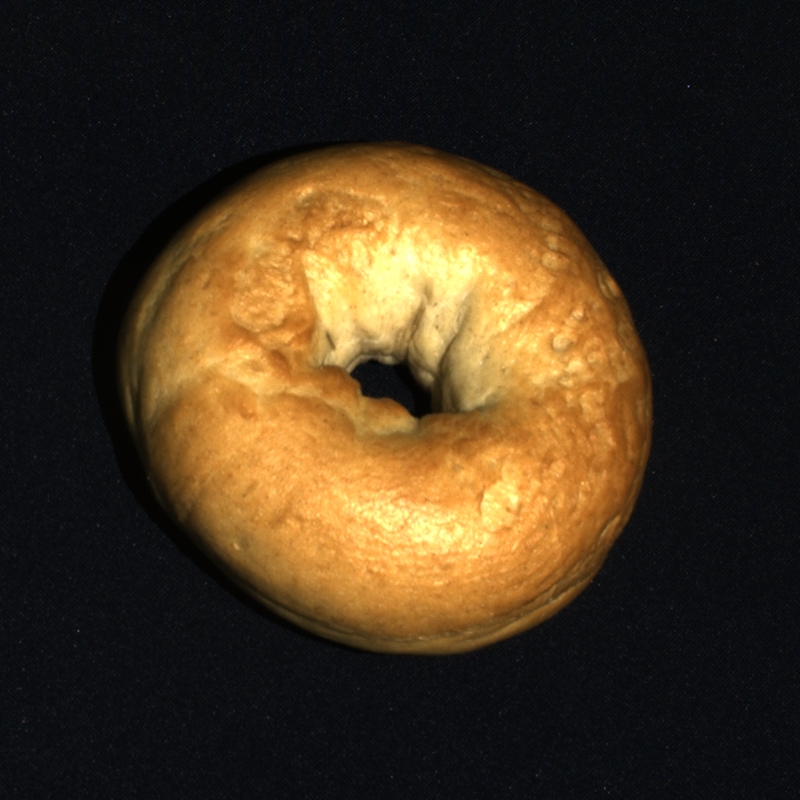

In [66]:
Image.open('../../Dataset/MVtecAD3D/bagel/train/good/rgb/000.png')

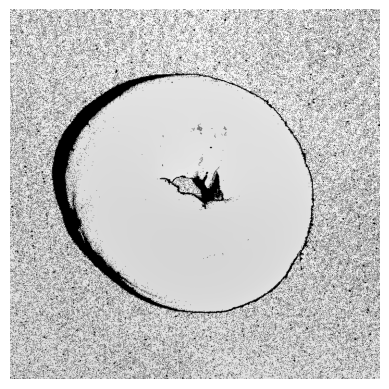

In [64]:
img =  tifffile.imread('../../Dataset/MVtecAD3D/bagel/train/good/xyz/000.tiff')
z = img[:,:,-1]
plt.imshow(z,cmap='gray')
plt.axis(False)
plt.show()

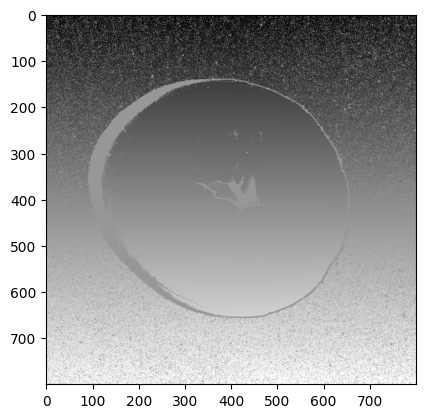

In [65]:
plt.imshow(img[:,:,1],cmap='gray')

# Z Image 

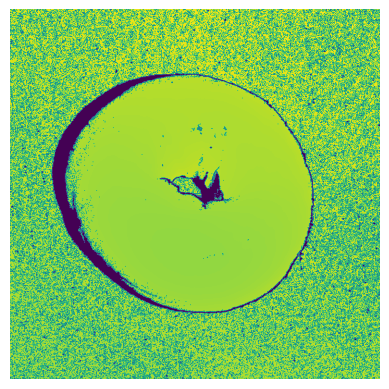

In [5]:
z = img[:,:,-1]
plt.imshow(z)
plt.axis(False)
plt.show()

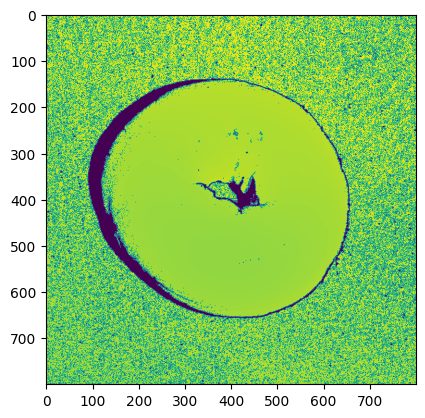

In [26]:
z = img[:,:,-1]
a=250
b=350
c=300
d=500
#plt.imshow(z[a:b,c:d])
plt.imshow(z)

plt.show()

# Fill gaps 

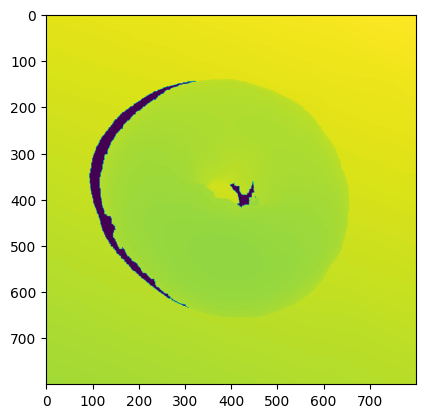

In [12]:
depth = z 
for _ in range(3):
    depth = fill_gaps(depth)
plt.imshow(depth)

# Foreground extract 

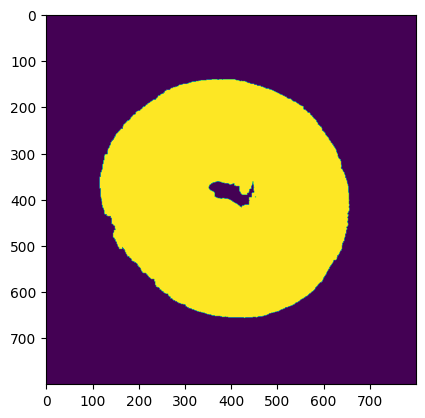

In [14]:
fg = remove_background(depth,c.bg_thresh)
plt.imshow(fg)

# Foreground mask 

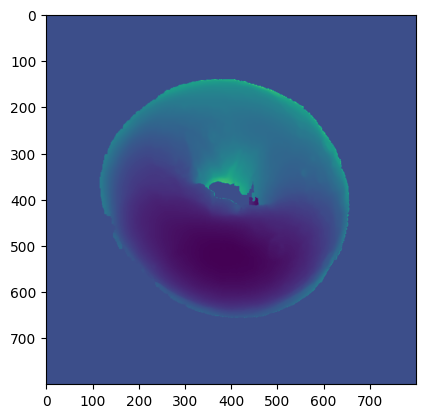

In [15]:
mean_fg = np.sum(fg * depth) / np.sum(fg)
depth = fg * depth + (1 - fg) * mean_fg
depth = (depth - mean_fg) * 100
plt.imshow(depth)